In [1]:
######### MODULES ##########
import sys, os, re
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [6]:
######## FUNCTIONS #########

def read_data(shot, silent= False):
    ###FIND MATCHING FILE NAMES
    relitive_path = "data\\"
    file_names = os.listdir(relitive_path) # lists out the names of all files in the working directory
    kirills_file_names = [file_name for file_name in file_names if len(re.findall(".*SHOT"+ str(shot) + "[^0-9]*[0-9]{3}[^0-9].*.csv", file_name))]
    phils_file_names = [file_name for file_name in file_names if len(re.findall("(?i)s0*{:d}[^0-9]*\.csv".format(shot) , file_name))]
    xray_file_names = [file_name for file_name in file_names if len(re.findall(".*SHOT{:d}.tif".format(shot) , file_name))]
    filtered_file_names = kirills_file_names + phils_file_names + xray_file_names
    ###PRINT FILE INFO
    if not silent: # remember to do silent == True if you use read_data in a loop
        print("Found {:d} files:".format(len(filtered_file_names)))
        [print("   " + filtered_file_name) for filtered_file_name in filtered_file_names]
    ###PUT OSCILLOSCOPE FILES INTO DICTIONARY
    dictionary = {}
    for phils_file_name in phils_file_names: # should only be 1 file
        for n, column in enumerate(["time","bdot","tof","diode"]): # some data files have Ch4 but it's just noise.
            dictionary[column] = np.genfromtxt(relitive_path+phils_file_name, delimiter=',', skip_header =18, usecols=n)
    ###PUT THZ FILES INTO DICTIONARY
    for kirill_file_name in kirills_file_names: # should only be 2 files
        for Ch in ["Ch1","Ch2","Ch3","Ch4"]:
            channel = Ch if Ch in kirill_file_name
        dictionary["pyro_time"], dictionary[channel] = np.genfromtxt(relitive_path+kirill_file_name, delimiter=',', skip_header =0, usecols=(3,4)).T

    ###PUT XRAY FILES INTO DICTIONARY
    for xray_file_name in xray_file_names: # should only be 2 files
        raw = "_raw" if "raw" in xray_file_name else ""
        dictionary["xray" + raw] = np.array(Image.open(relitive_path+xray_file_name))

    return dictionary

def read_lots_of_data(shots, requested_data, silent= False): #read_data is too slow because it reads all files
    relitive_path = "data\\"
    file_names = os.listdir(relitive_path) # lists out the names of all files in the working directory
    shots = np.array([str(shot) for shot in shots])
    dictionary = {}
    oscilloscope_data = ["time","bdot","tof","diode"]

    if requested_data in ["gentec","gentec_time"]:
        filtered_file_names = [file_name for file_name in file_names if len(re.findall(".*SHOT("+'|'.join(shots)+")[^0-9]*[0-9]{3}[^0-9].*Ch1.csv", file_name))]
        for filtered_file_name in filtered_file_names:
            dictionary[filtered_file_name] = np.genfromtxt(relitive_path+filtered_file_name, delimiter=',', skip_header =0, usecols= 3 if requested_data == "gentec_time" else 4)

    elif requested_data in ["custom","custom_time"]:
        filtered_file_names = [file_name for file_name in file_names if len(re.findall(".*SHOT("+'|'.join(shots)+")[^0-9]*[0-9]{3}[^0-9].*Ch2.csv", file_name))]
        for filtered_file_name in filtered_file_names:
            dictionary[filtered_file_name] = np.genfromtxt(relitive_path+filtered_file_name, delimiter=',', skip_header =0, usecols= 3 if requested_data == "custom_time" else 4)

    elif requested_data in oscilloscope_data:
        filtered_file_names = [file_name for file_name in file_names if len(re.findall("(?i)s0*("+'|'.join(shots)+")[^0-9]*\.csv", file_name))]
        for filtered_file_name in filtered_file_names:
            column = oscilloscope_data.index(requested_data)
            dictionary[filtered_file_name] = np.genfromtxt(relitive_path+filtered_file_name, delimiter=',', skip_header =18, usecols= column)

    elif requested_data in ["xray", "xray_raw"]:
        filtered_file_names = [file_name for file_name in file_names if len(re.findall(".*SHOT("+'|'.join(shots)+").tif", file_name))]
        raw = [True if "raw" in filtered_file_name else False for filtered_file_name in filtered_file_names]
        if requested_data == "xray":
            filtered_file_names = np.array(filtered_file_names)[np.logical_not(raw)]
        else:
            filtered_file_names = np.array(filtered_file_names)[raw]
        for filtered_file_name in filtered_file_names: # should only be 2 files
            dictionary[filtered_file_name] = np.array(Image.open(relitive_path+filtered_file_name))

    if not silent: # remember to do silent == True if you use read_data in a loop
        print("Found {:d} files:".format(len(filtered_file_names)))
        [print("   " + filtered_file_name) for filtered_file_name in filtered_file_names]

    return list(dictionary.values()) # Would be nice to have a dict the shot number as keys.


In [12]:
xray_images = read_lots_of_data([1,2,8,10,42,58], "xray")
xray_image = xray_images[0]
xray_max = np.max(xray_image)
print(xray_max)

xray_not_saturated = xray_image[xray_image]

Found 1 files:
   2024 janvier 25 11_58_05 SHOT58.tif
13.9992075


In [256]:
read_data(8)

Found 3 files:
   190124FOILSHOT8_001_Ch1.csv
   190124FOILSHOT8_001_Ch2.csv
   s08_ALL.csv


{'time': array([-1.94999641e-06, -1.94997641e-06, -1.94995641e-06, ...,
         2.04994359e-06,  2.04996359e-06,  2.04998359e-06]),
 'bdot': array([-0.0016125 , -0.00114688, -0.0005375 , ..., -0.000525  ,
        -0.00089375, -0.00114062]),
 'tof': array([-0.00554687, -0.0065625 , -0.00692188, ...,  0.00275   ,
         0.00342188,  0.00184375]),
 'diode': array([-0.00017656, -0.00023437, -0.00025156, ..., -0.00022188,
        -0.00037031, -0.00049375]),
 'gentec_time': array([-0.05    , -0.049995, -0.04999 , ...,  0.049985,  0.04999 ,
         0.049995]),
 'gentec': array([ 0.23999996, -0.08000004, -0.02000004, ...,  0.03999996,
        -0.16000004,  0.23999996]),
 'custom_time': array([-0.05    , -0.049995, -0.04999 , ...,  0.049985,  0.04999 ,
         0.049995]),
 'custom': array([-0.036 , -0.0504, -0.0504, ..., -0.0612, -0.0612, -0.0684])}

In [199]:
shot_max = 57

bdot_maxs, shot_number_bdot = np.array([[np.max(read_data(shot= shot, silent= True)["bdot"]), shot] for shot in np.arange(1, shot_max) if "bdot" in read_data(shot= shot, silent= True)]).T


bdot_maxs

array([0.04787813, 0.02772812, 0.07679375, 0.07679375, 0.101575  ,
       0.08385937, 0.10846094, 0.10652344, 0.09017969, 0.075125  ,
       0.05253125, 0.05023437, 0.03290625, 0.05789844, 0.03789062,
       0.0913125 , 0.06733594, 0.11939063, 0.07310938, 0.08691406,
       0.071375  , 0.08321094, 0.0526875 , 0.0255625 , 0.08415625,
       0.07638281])

In [200]:
pyro_maxs, shot_number_pyro = np.array([[np.max(read_data(shot= shot, silent= True)["custom"]), shot] for shot in np.arange(1, shot_max) if "custom" in read_data(shot= shot, silent= True)]).T
pyro_maxs

ValueError: not enough values to unpack (expected 2, got 0)

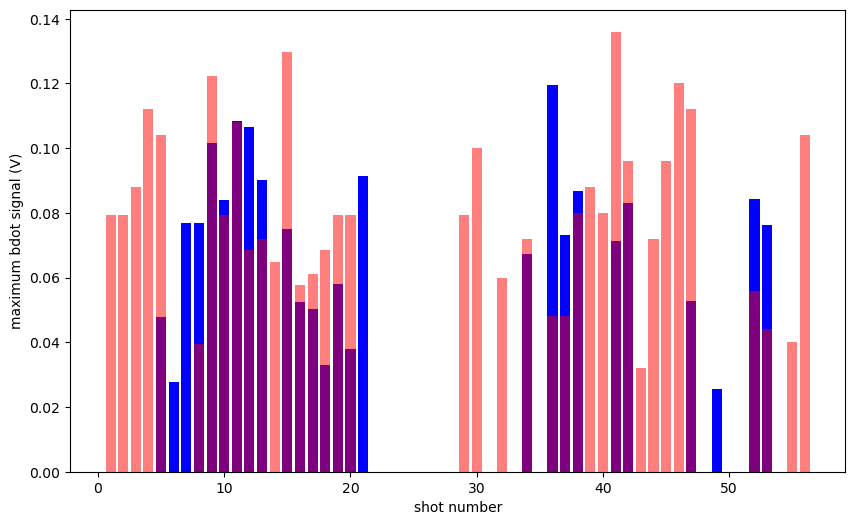

In [ ]:
plt.figure(figsize= (10,6))

plt.bar(shot_number_bdot, bdot_maxs, color="blue")
plt.bar(shot_number_pyro, pyro_maxs, color="red", alpha=0.5)

plt.xlabel("shot number")
plt.ylabel("maximum bdot signal (V)")

plt.show()


In [ ]:
data = read_data(shot= 34)

data

Found 2 files:
   190124FOILSHOT34000_Ch2.csv
   s34_ALL.csv


{'time': array([-1.19989375e-07, -1.19969375e-07, -1.19949375e-07, ...,
         8.79950625e-07,  8.79970625e-07,  8.79990625e-07]),
 'bdot': array([-0.00121875, -0.00196875, -0.0025625 , ...,  0.00434375,
         0.0035625 ,  0.00214844]),
 'tof': array([ 0.02359375,  0.021875  ,  0.01492187, ...,  0.00125   ,
        -0.0053125 , -0.01210938]),
 'diode': array([-4.062500e-04, -4.046875e-04, -3.953125e-04, ...,  1.406250e-05,
         7.812500e-06, -1.406250e-05]),
 'custom_time': array([-0.05    , -0.049995, -0.04999 , ...,  0.049985,  0.04999 ,
         0.049995]),
 'custom': array([0.04 , 0.032, 0.048, ..., 0.008, 0.024, 0.024])}

Found 3 files:
   190124FOILSHOT8_001_Ch1.csv
   190124FOILSHOT8_001_Ch2.csv
   s08_ALL.csv
Found 3 files:
   190124FOILSHOT8_001_Ch1.csv
   190124FOILSHOT8_001_Ch2.csv
   s08_ALL.csv


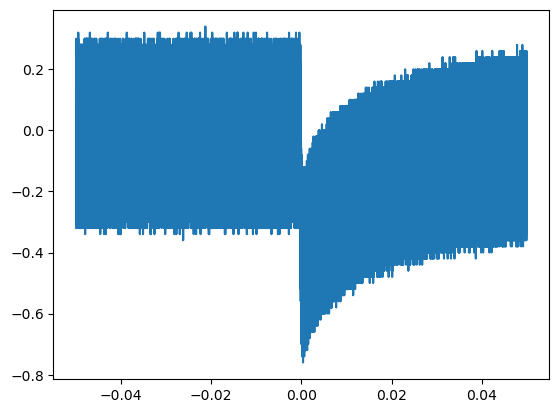

In [ ]:
array_time = read_data(8)["gentec_time"]
array_data = read_data(8)["gentec"]
plt.plot(array_time, array_data)
plt.show()